<a href="https://colab.research.google.com/github/PhiWhyyy/E-Commerce-Business-Analysis/blob/main/E_Commerce_Business_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
df= pd.read_excel("/content/drive/MyDrive/E-Commerce.xlsx")
df.head()

,item.category,subcategory,brand,price,rating
0,electronics,mobiles accessories,Autosun,900,4.4
1,electronics,mobiles accessories,iCase,700,4.7
2,electronics,mobiles accessories,13tech,600,4.5
3,electronics,mobiles accessories,Portronics,300,4.4
4,electronics,computers accessories,SNDIA,1000,4.5


In [3]:
# Group by 'item.category' and find the row with the maximum price in each group
costliest_brands = df.loc[df.groupby('item.category')['price'].idxmax()]
display(costliest_brands[['item.category', 'brand', 'price']])

,item.category,brand,price
25,Clothing,Manyavar,2000
7,electronics,Apple,5000
18,furniture,Afydecor,90000


In [4]:
most_budget_friendly_brands= df.loc[df.groupby("item.category")["price"].idxmin()]
display(most_budget_friendly_brands[["item.category","brand","price"]])

,item.category,brand,price
28,Clothing,Superdeal,400
3,electronics,Portronics,300
19,furniture,FurnitureKraft,5000


In [5]:
df=pd.read_excel("/content/drive/MyDrive/XYZ company dataset_Updated Ecommerce Sheet.xlsx")
Costlient_brands=df.loc[df.groupby("Product")["Unit_Price"].idxmax()]
display(Costlient_brands[["Product","Unit_Price","Total_Value"]])

,Product,Unit_Price,Total_Value
51,Bed,49000,49000
75,Bookshelf,13500,13500
76,Camera,35000,70000
67,Chair,3400,13600
23,Coffee Table,7500,15000
3,Dining Table,16000,48000
68,Gaming Console,43000,43000
4,Headphones,4000,16000
2,Laptop,72000,72000
83,Product,Unit_Price,Total_Value


In [6]:
display(df.columns)

Index(['Order_ID', 'Order_Date', 'Category', 'Product', 'Quantity',
       'Unit_Price', 'Total_Value', 'Payment_Method', 'City', 'Status'],
      dtype='object')

In [7]:
df=pd.read_excel("/content/drive/MyDrive/XYZ company dataset_Updated Ecommerce Sheet.xlsx")
Affordable_brands=df.loc[df.groupby("Product")["Unit_Price"].idxmin()]
display(Affordable_brands[["Product","Unit_Price","Total_Value"]])

,Product,Unit_Price,Total_Value
65,Bed,44000,88000
27,Bookshelf,11000,22000
16,Camera,25000,50000
21,Chair,2800,11200
35,Coffee Table,6800,13600
41,Dining Table,13500,13500
12,Gaming Console,40000,40000
32,Headphones,3500,10500
14,Laptop,68000,68000
83,Product,Unit_Price,Total_Value


In [8]:
delivered_df = df[df['Status'] == 'Delivered']
Affordable_brands = delivered_df.loc[delivered_df.groupby("Product")["Unit_Price"].idxmin()]
display(Affordable_brands[["Product","Unit_Price","Total_Value"]])

,Product,Unit_Price,Total_Value
65,Bed,44000,88000
27,Bookshelf,11000,22000
16,Camera,25000,50000
53,Chair,2900,14500
13,Coffee Table,7000,14000
61,Dining Table,14500,14500
12,Gaming Console,40000,40000
32,Headphones,3500,10500
48,Laptop,68000,68000
40,Smartphone,21000,21000


In [9]:
df['Total_Value'] = pd.to_numeric(df['Total_Value'], errors='coerce')
Total_Sales = df['Total_Value'].sum()
print(f"Total Sales: {Total_Sales}")

Total Sales: 3312100.0


In [10]:
high_value_sales_df = df[(df['Total_Value'] > 50000) & (df['Status'] == 'Delivered')]
High_Value_Sales = high_value_sales_df['Total_Value'].sum()
print(f"High Value Sales (Delivered): {High_Value_Sales}")

High Value Sales (Delivered): 1236000.0


In [11]:
!pip install pandasql
import pandasql as pdsql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=edf1752d9f6b62e578f6ec773f26034fe9954e5c12d5418b1286c605c66b30e9
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


In [12]:
# SQL query to calculate total revenue per category
query_category_revenue = """
SELECT Category, SUM(Total_Value) AS Total_Revenue
FROM df
GROUP BY Category
ORDER BY Total_Revenue DESC;
"""
category_revenue = pdsql.sqldf(query_category_revenue, globals())
display(category_revenue)

query_monthly_sales = """
SELECT strftime('%Y-%m', Order_Date) AS Month, SUM(Total_Value) AS Monthly_Revenue
FROM df
GROUP BY Month
ORDER BY Month;
"""
monthly_sales = pdsql.sqldf(query_monthly_sales, globals())
display(monthly_sales)

,Category,Total_Revenue
0,Electronics,1796600.0
1,Furniture,1515500.0
2,Category,NaN


,Month,Monthly_Revenue
0,None,NaN
1,2022-01,120000.0
2,2022-02,53000.0
3,2022-03,31000.0
4,2022-04,83500.0
5,2022-05,110700.0
6,2022-06,32000.0
7,2022-07,111000.0
8,2022-08,46600.0
9,2022-09,110800.0


In [13]:
# SQL query to count orders by category and status
query_category_status = """
SELECT Category, Status, COUNT(Status) AS Total_Status
FROM df
GROUP BY Category, Status
ORDER BY Category, Status;
"""
category_status = pdsql.sqldf(query_category_status, globals())
display(category_status)

,Category,Status,Total_Status
0,Category,Status,1
1,Electronics,Cancelled,3
2,Electronics,Delivered,37
3,Electronics,Returned,3
4,Electronics,Shipped,4
5,Furniture,Cancelled,2
6,Furniture,Delivered,28
7,Furniture,Returned,7
8,Furniture,Shipped,9


In [14]:
query_category_cancelled = """
SELECT Category, COUNT(Status) AS Cancelled_Orders
FROM df
WHERE Status = 'Cancelled'
GROUP BY Category
ORDER BY Category;
"""
category_cancelled = pdsql.sqldf(query_category_cancelled, globals())
display(category_cancelled)

,Category,Cancelled_Orders
0,Electronics,3
1,Furniture,2


In [15]:
#returned parcels
query_category_returned="""
SELECT Category, COUNT(Status) AS Returned_Orders
FROM df
WHERE Status ='Returned'
GROUP BY Category
ORDER BY Category DESC;
"""
category_returned = pdsql.sqldf(query_category_returned, globals())
display(category_returned)

,Category,Returned_Orders
0,Furniture,7
1,Electronics,3


We had majority returns of Furniture followed by Electronics. This is something we might bring to our concern.

In [16]:
query_city_returned="""
SELECT City, COUNT(Status) AS City_Returned_Orders
FROM df
WHERE Status ='Returned'
GROUP BY City
ORDER BY City_Returned_Orders DESC;
"""
category_city_returned = pdsql.sqldf(query_city_returned, globals())
display(category_city_returned)

,City,City_Returned_Orders
0,Delhi,6
1,Kolkata,2
2,Pune,1
3,Bangalore,1


Delhi shows the highest returns for parcels. Need to check the qualities sent here or implement techniques to ensure reducing that number

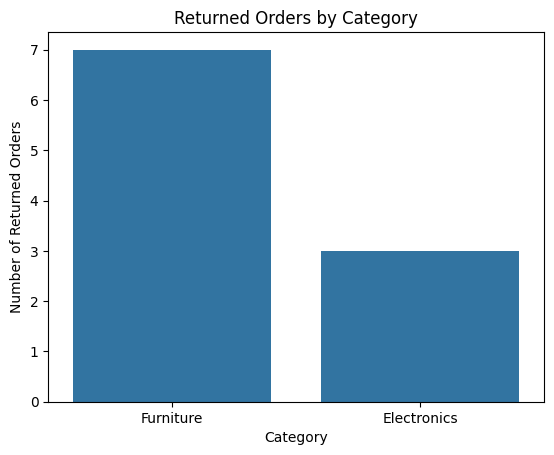

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot of returned orders by category
sns.barplot(x='Category', y='Returned_Orders', data=category_returned)
plt.title('Returned Orders by Category')
plt.xlabel('Category')
plt.ylabel('Number of Returned Orders')
plt.show()

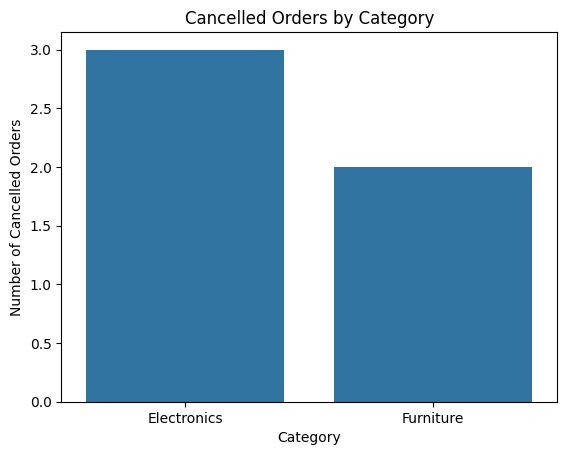

In [18]:
sns.barplot(x='Category', y='Cancelled_Orders', data=category_cancelled)
plt.title('Cancelled Orders by Category')
plt.xlabel('Category')
plt.ylabel('Number of Cancelled Orders')
plt.show()

In [32]:
if 'Status' in df.columns:
    cancellation_rate = (df[df['Status'].str.lower() == 'cancelled'].shape[0] / len(df)) * 100
    print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Cancellation Rate: 5.32%


In [19]:
product_total_value = df.groupby('Product')['Total_Value'].sum()
max_business_product = product_total_value.idxmax()
# Corrected line to find the maximum unit price for the product with the maximum business
unit_cost = df[df['Product'] == max_business_product]['Unit_Price'].max()
max_business_value = product_total_value.max()

print(f"The product bringing the maximum business in terms of Total_Value is '{max_business_product}' each costing '{unit_cost}' with a total value of {max_business_value:.2f}")

The product bringing the maximum business in terms of Total_Value is 'Laptop' each costing '72000' with a total value of 562000.00


Based on our data, XYZ had the maximum growth from the sales of Laptop, costing Rs. 72,000 each.

And minimum growth from Coffee table each costing Rs. 6,800 each.

In [20]:
df = pd.read_excel('/content/drive/MyDrive/XYZ company dataset_Updated Ecommerce Sheet.xlsx') # Skip the first row

df['Total_Value'] = pd.to_numeric(df['Total_Value'], errors='coerce')
filtered_df = df[df['Total_Value'] > 0]

product_total_value = filtered_df.groupby('Product')['Total_Value'].sum()
min_business_product = product_total_value.idxmin()
min_unit_cost = df[df['Product'] == min_business_product]['Unit_Price'].min()
min_business_value = product_total_value.min()

print(f"The product bringing the minimum business in terms of Total_Value is '{min_business_product}' each costing '{min_unit_cost}' with a total value of {min_business_value:.2f}")

The product bringing the minimum business in terms of Total_Value is 'Coffee Table' each costing '6800' with a total value of 71400.00


But does the above inference directly refer to the fact that sale of laptop gave us most profit and coffee table the least?


In [21]:
df=pd.read_excel('/content/drive/MyDrive/XYZ company dataset_Updated Ecommerce Sheet.xlsx')
max_category_sold= df.groupby('Product')['Quantity'].max()

query_category_status="""
SELECT Category, COUNT(Status) as Total_Status
FROM df
WHERE Status == 'Delivered'
GROUP BY Category
ORDER BY Category
"""
category_delivered= pdsql.sqldf(query_category_status, globals())
display(category_delivered)

,Category,Total_Status
0,Electronics,37
1,Furniture,28


Hence, we sold maximum Electronics then furniture which indirectly support our above inference on Sales.

In [22]:
df=pd.read_excel('/content/drive/MyDrive/XYZ company dataset_Updated Ecommerce Sheet.xlsx')
max_item_sold= df.groupby('Product')['Quantity'].max()

query_product_status="""
SELECT Product, COUNT(Status) as Total_Status
FROM df
WHERE Status == 'Delivered' AND Status NOT IN ('Cancelled', 'Returned', 'Pending','Shipped')
GROUP BY Product
ORDER BY Total_Status DESC;
"""
product_delivered= pdsql.sqldf(query_product_status, globals())
display(product_delivered)

,Product,Total_Status
0,Smartphone,8
1,Laptop,7
2,Camera,6
3,Bed,6
4,Coffee Table,5
5,Chair,5
6,Wardrobe,4
7,Tablet,4
8,Smartwatch,4
9,Headphones,4


Now let's check the demographics- in which city we had the max sales

In [23]:
df=pd.read_excel('/content/drive/MyDrive/XYZ company dataset_Updated Ecommerce Sheet.xlsx')
max_city_sold= df.groupby('City')['Quantity'].max()

query_city_delivered="""
SELECT City, COUNT(Status) as Total_Status
FROM df
WHERE Status == 'Delivered' AND Status NOT IN ('Cancelled', 'Returned', 'Pending','Shipped')
GROUP BY City
ORDER BY Total_Status DESC;
"""
city_delivered= pdsql.sqldf(query_city_delivered, globals())
display(city_delivered)

,City,Total_Status
0,Mumbai,15
1,Hyderabad,11
2,Bangalore,10
3,Pune,8
4,Kolkata,8
5,Chennai,7
6,Delhi,6


In [28]:
city_orders = df['City'].value_counts()
top_city = city_orders.idxmax()
print(f"City '{top_city}' contributes the highest orders ({city_orders.max()} orders).")

City 'Mumbai' contributes the highest orders (16 orders).


Hence, our maximum consumers come from Mumbai

In [26]:
df=pd.read_excel('/content/drive/MyDrive/XYZ company dataset_Updated Ecommerce Sheet.xlsx')
# Filter out the row where Category is 'Category'
filtered_df = df[df['Category'] != 'Category']

category_revenue = filtered_df.groupby('Category')['Total_Value'].sum()
top_category = category_revenue.idxmax()
top_category_share = (category_revenue.max() / category_revenue.sum()) * 100
print(f"Category '{top_category}' brings {top_category_share:.2f}% of total revenue.")

Category 'Electronics' brings 54.24% of total revenue.


In [29]:
payment_method = df['Payment_Method'].value_counts(normalize=True)
top_payment = payment_method.idxmax()
top_payment_share = payment_method.max() * 100
print(f"'{top_payment}' is the most preferred payment method ({top_payment_share:.2f}% of all orders).")

'UPI' is the most preferred payment method (24.47% of all orders).
